In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("/content/BATASHOE.csv",parse_dates=['DATE'])
df.head()

#       DATE TRADING CODE    LTP*  ...     YCP  TRADE  VALUE (mn)  VOLUME
0  439 2018-05-08     BATASHOE  1123.0  ...  1109.6   40.0        0.58   525.0
1  438 2018-06-08     BATASHOE  1101.0  ...  1109.6   46.0        1.34  1210.0
2  437 2018-07-08     BATASHOE  1108.0  ...  1102.5   24.0        0.60   540.0
3  436 2018-08-08     BATASHOE  1108.0  ...  1107.2    8.0        0.44   396.0
4  435 2018-09-08     BATASHOE  1109.9  ...  1108.3   26.0        3.34  3009.0

[5 rows x 12 columns]

In [2]:
# Sort DataFrame by date
df = df.sort_values('DATE')

# Double check the result
df.head()

#       DATE TRADING CODE    LTP*  ...     YCP  TRADE  VALUE (mn)  VOLUME
36  403 2018-01-10     BATASHOE  1092.0  ...  1094.9   22.0        0.50   451.0
59  380 2018-01-11     BATASHOE  1086.6  ...  1090.9   45.0        0.65   600.0
37  402 2018-02-10     BATASHOE  1093.0  ...  1095.9   17.0        0.26   240.0
79  360 2018-02-12     BATASHOE  1135.6  ...  1131.4   82.0        3.76  3303.0
16  423 2018-03-09     BATASHOE  1110.1  ...  1111.4    1.0        0.00     1.0

[5 rows x 12 columns]

In [3]:
df = df.set_index('DATE')
df.head(3)

# TRADING CODE    LTP*    HIGH  ...     YCP  TRADE  VALUE (mn)  VOLUME
DATE                                          ...                                   
2018-01-10  403     BATASHOE  1092.0  1105.0  ...  1094.9   22.0        0.50   451.0
2018-01-11  380     BATASHOE  1086.6  1095.0  ...  1090.9   45.0        0.65   600.0
2018-02-10  402     BATASHOE  1093.0  1104.0  ...  1095.9   17.0        0.26   240.0

[3 rows x 11 columns]

In [4]:
df['daily_ret'] = df['CLOSEP*'].pct_change()
df['daily_ret'] = df['daily_ret'].fillna(0.0)

In [5]:
df['volatility']= df['daily_ret'].rolling(window=21).std()
df['volatility'] = df['volatility'].fillna(0.0)

In [6]:
df['volatility'] = df['volatility']*100

In [7]:
import matplotlib.pyplot as plt 

In [8]:
df=df.reset_index()['volatility']

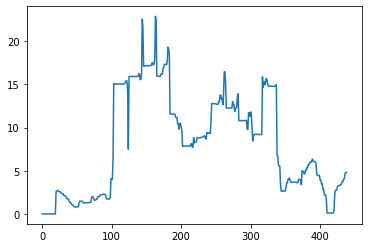

In [9]:
plt.plot(df)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [11]:
df.shape

(439, 1)

In [12]:
##splitting dataset into train and test split where train=70 percent and test=30 percent
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]




In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [],[]
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:

training_size,test_size

(307, 132)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:



#1D cnn model
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(100,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 72ms/step - loss: 0.1891 - val_loss: 0.0157
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0302 - val_loss: 0.0162
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0212 - val_loss: 0.0307
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0161 - val_loss: 0.0446
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0133 - val_loss: 0.0567
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0108 - val_loss: 0.0538
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0094 - val_loss: 0.0418
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0092 - val_loss: 0.0495
Epoch 9/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0068 - val_loss: 0.0574
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0074 - val_loss: 0.0645
Epoch 11/100
7/7 [=======

In [19]:
import tensorflow as tf
from sklearn.metrics import r2_score

In [20]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [21]:

##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
X = np.reshape(ytest,(1, ytest.size))
Y_test =scaler.inverse_transform(X)

In [22]:
Y_test = Y_test.transpose()
RMSE = math.sqrt(mean_squared_error(Y_test,test_predict))
RMSE

6.325623845678069

In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test,test_predict)
print('MAE: %f' % mae)

MAE: 6.076375


In [24]:
Y_test

array([[2.21153079],
       [2.2089392 ],
       [1.52635739],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.10509743],
       [0.42252864],
       [2.19797101],
       [2.74857836],
       [2.74857836],
       [2.77935093],
       [3.17764741],
       [3.24681629],
       [3.28206818],
       [3.28206818],
       [3.37756298],
       [3.38942514],
       [3.58561286],
       [3.74520172],
       [3.75756013],
       [4.04013934],
       [4.12957771],
       [4.71542038],
       [4.76492333]])

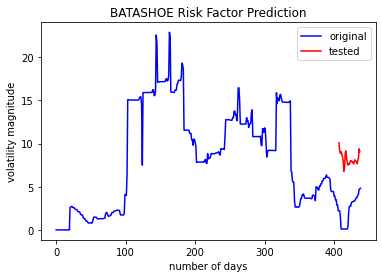

In [25]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),color ='blue', label ='original')
#plt.plot(trainPredictPlot, color ='orange', label ='predicted')
plt.plot(testPredictPlot , color ='red', label ='tested')
#plt.show()
plt.xlabel('number of days')
plt.ylabel('volatility magnitude')
plt.title('BATASHOE Risk Factor Prediction')
plt.legend(loc='best')
plt.show(block=False)


In [26]:
len(test_data)

132

In [27]:

x_input=test_data[32:].reshape(1,-1)
x_input.shape


(1, 100)

In [28]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


In [29]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

#print(lst_output)


[0.3633981]
101
1 day input [0.24840994 0.24084017 0.24096392 0.14689547 0.11517199 0.11719763
 0.11718937 0.11411025 0.11495639 0.11503528 0.11932236 0.13677069
 0.15822352 0.159194   0.17768744 0.17736957 0.18190739 0.16740426
 0.16090703 0.16006709 0.15989188 0.15992915 0.16070089 0.16063766
 0.16086637 0.1609141  0.15927931 0.15778765 0.15770085 0.17538494
 0.17535282 0.17432559 0.168543   0.14791934 0.21826141 0.21503288
 0.21504163 0.20265082 0.20200035 0.22187353 0.22127576 0.2340265
 0.23388595 0.24904847 0.24841739 0.26068575 0.26069064 0.2607839
 0.26974376 0.27805733 0.2658141  0.2658141  0.26567004 0.26138176
 0.25787633 0.20530677 0.19435478 0.19434635 0.19434635 0.19434635
 0.17094988 0.1709745  0.15235556 0.15233624 0.12504054 0.12474064
 0.09664291 0.09664291 0.09652965 0.06670113 0.00459271 0.00459271
 0.00459271 0.00459271 0.00459271 0.00459271 0.00459271 0.00459271
 0.00459271 0.00459271 0.01846431 0.09605035 0.12011164 0.12011164
 0.12145639 0.13886177 0.14188442 0.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [32]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [33]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110])

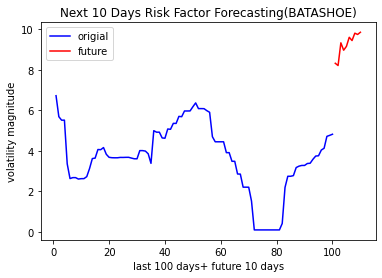

In [35]:

plt.plot(day_new,scaler.inverse_transform(df[339:]),color ='blue', label ='origial')
plt.plot(day_pred,scaler.inverse_transform(lst_output),color='red', label='future')
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 10 Days Risk Factor Forecasting(BATASHOE)')
plt.legend(loc='best')
plt.show(block=False)

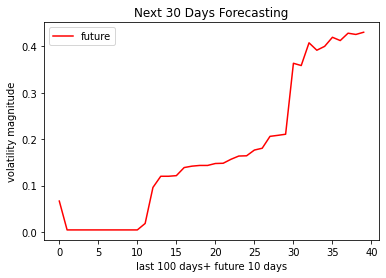

In [37]:
df3=df.tolist()
df3.extend(lst_output)
plt.xlabel('last 100 days+ future 10 days')
plt.ylabel('volatility magnitude')
plt.title('Next 30 Days Forecasting')
plt.plot(df3[409:],color='red', label='future')
plt.legend(loc='best')
plt.show(block=False)

In [38]:
df3=scaler.inverse_transform(df3).tolist()

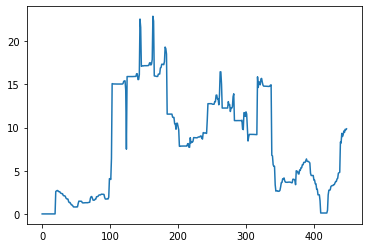

In [39]:
plt.plot(df3)